## Flight delays- Data Exploration and Analysis with Pandas

Problem: Our dataset contains data from the Bureau of the United States of transportation about the arrival, delay, and cancellation of domestic flights from July 2019 to July 2022. We will investigate and highlight which airlines and airports have the most delay and cancellation over time. We will also analyse the causes of the delays and cancellation. At last, we will see whether COVID-19 pandemic had an impact on the overwall flight cancellations.


## 1-Data Exploration
The first step of any data analysis is to explore your data with key Pandas commands:

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the Pandas library only once in your script:


In [3]:
import pandas as pd

The dataset has 3 CSV files, let's import them all:

To read a csv file in Pandas and store it in a variable, use the read_csv function such as :


In [6]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WK10-Pandas Learner/Resources/Flight Delays/Flights_Delay_Cause_2019-2020.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WK10-Pandas Learner/Resources/Flight Delays/Flights_Delay_Cause_2020-2021.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WK10-Pandas Learner/Resources/Flight Delays/Flights_Delay_Cause_2021-2022.csv")

The dataset contains data from US domestic flights from July 2019 to July 2022, and consists of the following fields:

- year: the year of the flight
- month: the month of the flight
- carrier: the 2 letters abbreviation for the airline
- carrier_name: the complete name of the airline
- airport: the 3 letters Airport code
- airport_name: the airport full name
- arr_flights: number of arrived flights ontime
- arr_del15: number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)
- arr_cancelled: number of cancelled flights
- arr_diverted: number of diverted flights
- arr_delay: number of delayed flights
- carrier_delay: number of flights delayed caused by the carrier
- weather_delay: number of flights delayed caused by the weather
- nas_delay: number of flighst delayed caused by the National Aviation System
- security_delay: number of flights delayed due to security issues


Let's explore the 5 first rows of the dataframe named df1:


In [7]:
df1.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN


Similarly, explore the 5 last rows of df1:

In [ ]:
df1.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0,NaN
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0,NaN
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0,NaN
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0,NaN
1679,2022,7,YX,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas Regional",56.0,13.0,3.0,0.0,1180.0,120.0,0.0,318.0,0.0,NaN


Since our dataset has 3 CSV files, for convenience let's combine all files in one document
with the .concat() method:

In [8]:
df= pd.concat([df1, df2, df3], ignore_index=True)
#setting the parameterignore_index=True will reasign new indexes to the whole dataset, the intial indexes of each document will be ignored

Let's explore the first few rows of the whole dataset:

In [9]:
df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN
5,2022,7,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",114.0,16.0,5.0,0.0,1145.0,131.0,207.0,64.0,0.0,NaN
6,2022,7,9E,NaN,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2219.0,470.0,8.0,10.0,41843.0,18321.0,1554.0,7029.0,0.0,NaN
7,2022,7,9E,NaN,ATW,"Appleton, WI: Appleton International",17.0,3.0,0.0,0.0,73.0,43.0,0.0,30.0,0.0,NaN
8,2022,7,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",37.0,4.0,3.0,0.0,301.0,279.0,22.0,0.0,0.0,NaN
9,2022,7,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",59.0,13.0,7.0,0.0,630.0,195.0,20.0,321.0,0.0,NaN


How many rows and columns the dataset has?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
dtypes: float64(10), int64(2), object(4)
memory usage: 5.2+ MB


The above .info() function gives us information regarding the number of rows and columns, the data types of each columns, the number of non-missing values (non-null), memory usage. Columns that contains strings datat (or mixed datatypes) will be recognised as Object in Pandas.

Make sure to check whether columns containing numerical values need to be converted as numeric for proper downsstream analyses.

Alternatively, we can use the attribute shape to have only returned the number of rows and columns:

In [10]:
df.shape

(42461, 16)

The attribute dtypes will return only the data types of each column:

In [ ]:
df.dtypes

year                int64
month               int64
carrier            object
carrier_name       object
airport            object
airport_name       object
arr_flights       float64
arr_del15         float64
arr_cancelled     float64
arr_diverted      float64
arr_delay         float64
carrier_delay     float64
weather_delay     float64
nas_delay         float64
security_delay    float64
delays            float64
dtype: object

We can quickly run some statistics with the describe() function:

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
count,42461.000000,42461.000000,42354.000000,42183.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,0.0
mean,2020.096324,6.529521,290.053950,41.470095,9.251641,0.624357,2757.859210,1007.217996,177.938495,587.135383,6.496647,NaN
std,0.815651,3.341909,836.485771,130.737062,70.613366,3.069780,9664.845862,3405.101443,742.131883,2784.605383,45.371314,NaN
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.000000,4.000000,33.000000,3.000000,0.000000,0.000000,158.000000,49.000000,0.000000,9.000000,0.000000,NaN
50%,2020.000000,7.000000,81.000000,10.000000,0.000000,0.000000,566.000000,211.000000,0.000000,80.000000,0.000000,NaN
75%,2021.000000,9.000000,194.000000,28.000000,3.000000,0.000000,1737.000000,705.000000,99.000000,282.000000,0.000000,NaN
max,2022.000000,12.000000,21873.000000,3506.000000,4951.000000,154.000000,305694.000000,119425.000000,26428.000000,200000.000000,3760.000000,NaN


Note: the 'year' and 'month' columns are seen as numerical values (they have the float datatype, as seen with the info() function). Hence, they will appear in the summary stats when using the describe() function. We would need to assigned to both the datetime datatype to be properly seen as dates.

## 2.Data tranformation:

After exploring the dataset variables, some data transformation migh be needed.

From the previous method used .info() we could see that the year and month are both float data types. To work efficiently with dates in Pandas, they need to be converted into a date datatype. This is done by using the .todatetime() method as followed:

Before doing any modications to our dataframe, we will create a copy to not modify yet the original dataset in case we insert an error and cannot remove it. If you make an error in the original dataset without creating a copy you will need to restart the Python intrepreter to clear data in memory and re-run your script from the start.

In [11]:
df_copy= df.copy(deep=True)

We can create a new column named "date" to store the date which will have the "month" and "year" from our dataset. We can concatenate our 2 columns month and year using the "+" sign:

In [12]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN


In [13]:
df_copy['date']= df_copy['month']+df_copy['year']
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2029
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2029
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2029
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2029
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2029


It looks like our new date column contain the wrong date in it, this is because the month has been added to the year since they are both integers data types!
To overcome this problem, we need to change the month and year datatypes to a string.
The .astype() method is used to cast pandas datatype to others:

In [14]:
#First, let's convert the month and year into a string datatype so we can concatenate them afterall:
#We need to use the .astype() methodf to convert data in Pandas
df_copy=df_copy.astype({"month": str, "year":str, "date":str})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  object 
 1   month           42461 non-null  object 
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
 16  date            42461 non-null  object 
dtypes: float64(10), object(7)
memor

Now our month and year column have been well transformed to a string data type called object in Pandas

In [15]:
#alternative method to convert datatypes in Pandas:
df_copy['month'].astype(str)
df_copy['year'].astype(str)
df_copy['date'].astype(str)

0        2029
1        2029
2        2029
3        2029
4        2029
         ... 
42456    2028
42457    2028
42458    2028
42459    2028
42460    2028
Name: date, Length: 42461, dtype: object

In [16]:
df_copy['date']= df_copy['year']+"-"+df_copy['month']
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-7
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-7
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-7
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-7
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-7


Now our new column named date have the right format with the year followed by the month.


Using the Pandas function .to_datetime() we can transform at once the date into a datetime datatype:

In [ ]:
df_copy['date']= pd.to_datetime(df_copy['date'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            42461 non-null  object        
 1   month           42461 non-null  object        
 2   carrier         42461 non-null  object        
 3   carrier_name    42445 non-null  object        
 4   airport         42461 non-null  object        
 5   airport_name    42461 non-null  object        
 6   arr_flights     42354 non-null  float64       
 7   arr_del15       42183 non-null  float64       
 8   arr_cancelled   42354 non-null  float64       
 9   arr_diverted    42354 non-null  float64       
 10  arr_delay       42354 non-null  float64       
 11  carrier_delay   42354 non-null  float64       
 12  weather_delay   42354 non-null  float64       
 13  nas_delay       42354 non-null  float64       
 14  security_delay  42354 non-null  float64       
 15  de

In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07-01
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07-01
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07-01
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07-01
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07-01


We can see from the column 'data' that we could assign datatime as datatype to the 'date' column, but doing this we also introduced by default a day number, here '01'. To overcome this we would need to use an additonal function to get only the month and the year with a correct date format.

In [ ]:
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')

In [ ]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  delays          0 non-null      float64  
 16  date            42461 non-null  period[M

The 'date' column was assigned the 'period' datatype which is another date fromat used in pandas.

Our new column "date" as been well created. Let's save it in our working folder:

In [17]:
df_copy.to_csv('flights_dataset.csv')

To save the file in a different location, like your Google Drive, you need to mount the drive first:

`from google.colab import drive; drive.mount('/content/drive')`.

Then, use a path within your Drive, like

`/content/drive/MyDrive/data/flights_dataset.csv`.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note: in the event you work with a dataset that has a column containing the full date named "date" for instance, you can set the date column to the datatype datetime directly when importing your dataset with Pandas using the argument "parse_dates" when calling the Pandas function such as: df=pd.read_csv("datafile", parse_dates=["date"])
This will give you a date format with days, months, and years by default

Let's removed unwanted columns, the month and year columns, using the medthod .drop():

In [ ]:
df_copy=df_copy.drop(['month', 'year'], axis=1)
df_copy.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


The columns month and year has been well removed.

## 3-Data Cleaning
The next step after exploring our dataset and correct some of the datatypes we did would be to clean the dataset

Let's check how many missing values our dataset has using the isnull() function:

In [19]:
df_copy.isnull().sum()

year                  0
month                 0
carrier               0
carrier_name         16
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42461
date                  0
dtype: int64

We can see see that missing values are presents in columns associated with numerical values and also in the carrier name. Missing data from the columns that contain important information on the name of the carrier or arilaine names that we are not able to identify can cause issues in our downstream analysis. We will me removed those for now since we cannot identify them.
Replacing missing values should always be case specific!

let's remove missing values from the carrier name:

In [ ]:
df_copy= df_copy.dropna(subset=['carrier_name'])

Let's verify the dataframe don't have any missing values left:

In [ ]:
df_copy.isnull().sum()

carrier               0
carrier_name          0
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42445
date                  0
dtype: int64

### Let's check the distribution of the data:

if you don't recall the name of the variables, use the following command to quicly get their names:

In [ ]:
df_copy.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

We can check the data distribution to see if we get outliers in columns with numerical values using the built-in box_plot function in Pandas:

we apply the method .box_plot to our dataframe named "df"

<Axes: >

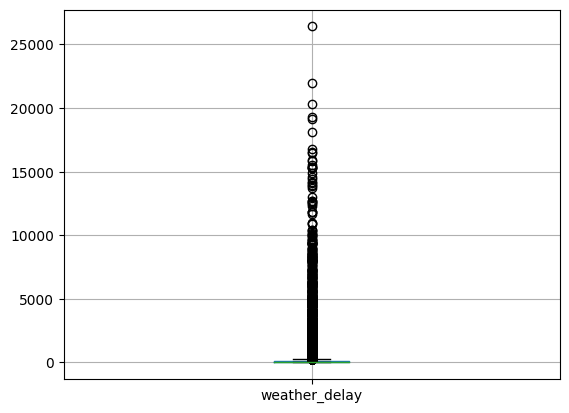

In [20]:
df_copy.boxplot('weather_delay')

let's reuse the boxplot using a function:

In [ ]:
#We create a function that will return a box plot:
def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

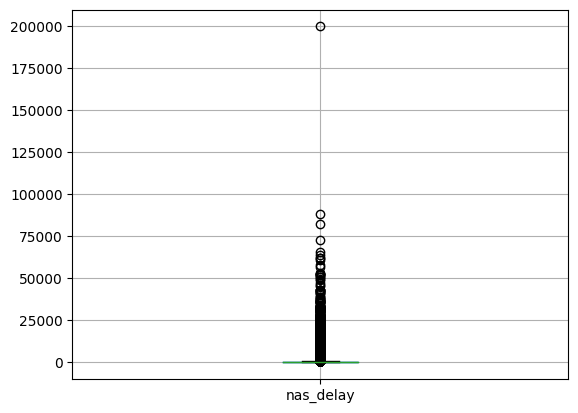

In [ ]:
#We call our function passing a data variable as argument:
box_plot('nas_delay')

Call the function again to check other variables.

In [ ]:
# Identify and remove the row with the outlier
outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [ ]:
outlier_index # we used the .index attribute to get the row number of our outlier

Int64Index([363], dtype='int64')

<Axes: >

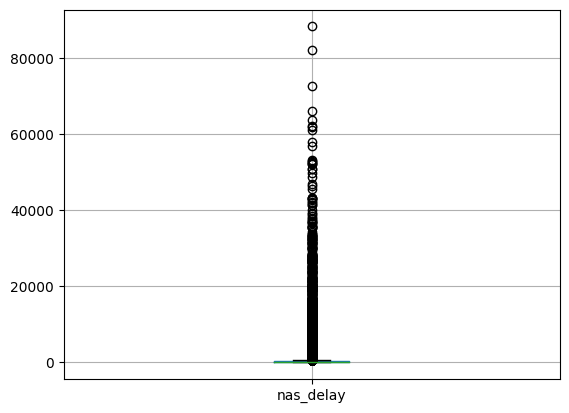

In [ ]:
df_cleaned.boxplot('nas_delay')

We can see from the above boxplot that the outliser has been well removed.

Using the Python Matplotlib visualisation library, we can plot several plots at once using the subplots() function:

Let's import the Matplotlib library to use it

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

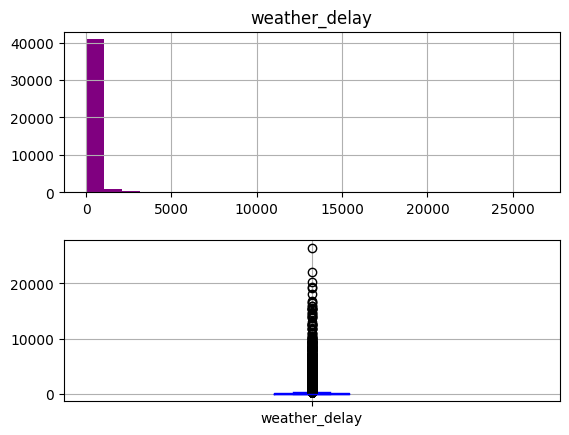

In [ ]:
figure, ax = plt.subplots(nrows=2, ncols=1) # subplot layer has 2 rows an 1 column which means 2 figures
df_cleaned.hist('weather_delay',ax=ax[0], bins=25, color="purple")
df_cleaned.boxplot("weather_delay",ax=ax[1], color="blue")


Same as before, but saved into a function to reuse:

In [ ]:
def subplot_function(data1, data2):  # I added one parameter per plot
    figure, ax = plt.subplots(nrows=2, ncols=1)

    # Get statistics
    min_val= df_cleaned[data1].min()
    max_val= df_cleaned[data1].max()
    mean_val= df_cleaned[data1].mean()
    med_val= df_cleaned[data1].median()

    # Add lines for the min, mean and median, and max
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'blue', linestyle='dashed', linewidth = 2)

    #Change labels- 1st plot
    ax[0].set_ylabel('Frequency')

    df_cleaned.hist(data1,ax=ax[0], bins=10, color="purple")


    #Change labels- 2nd plot
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Frequency')


    df_cleaned.boxplot(data2,ax=ax[1], color="blue")

**Explanation of the code:**
```python

def subplot_function(data1, data2):  # Define a function to create a multi-plot figure
    """
    Creates a figure with two subplots: a histogram for data1 and a boxplot for data2.
    Adds reference lines for min, mean, median, and max values in the histogram.

    Args:
        data1 (str): Name of the column in df_cleaned to be used for the histogram.
        data2 (str): Name of the column in df_cleaned to be used for the boxplot.
    """

    figure, ax = plt.subplots(nrows=2, ncols=1)  # Create a figure with 2 rows and 1 column of subplots

    # Get statistics for data1 to add reference lines
    min_val = df_cleaned[data1].min()
    max_val = df_cleaned[data1].max()
    mean_val = df_cleaned[data1].mean()
    med_val = df_cleaned[data1].median()

    # Add vertical reference lines for min, mean, median, and max in the first subplot
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=max_val, color='blue', linestyle='dashed', linewidth=2, label='Max')
    ax[0].legend()  # Add a legend to explain the reference lines

    # Create histogram for data1 in the first subplot
    ax[0].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.hist(data1, ax=ax[0], bins=10, color="purple")

    # Create boxplot for data2 in the second subplot
    ax[1].set_xlabel('')  # Remove x-axis label for cleaner presentation
    ax[1].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.boxplot(data2, ax=ax[1], color="blue")
```

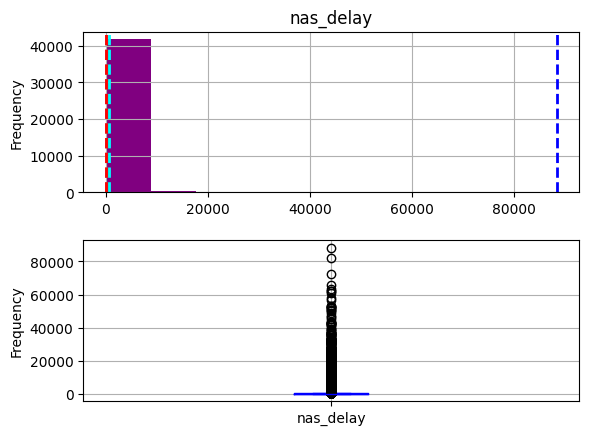

In [ ]:
subplot_function('nas_delay',"nas_delay")

In [ ]:
# Same plot with Labels

def subplot_function(data1, data2):  # Define a function to create a multi-plot figure
    """
    Creates a figure with two subplots: a histogram for data1 and a boxplot for data2.
    Adds reference lines for min, mean, median, and max values in the histogram.

    Args:
        data1 (str): Name of the column in df_cleaned to be used for the histogram.
        data2 (str): Name of the column in df_cleaned to be used for the boxplot.
    """

    figure, ax = plt.subplots(nrows=2, ncols=1)  # Create a figure with 2 rows and 1 column of subplots

    # Get statistics for data1 to add reference lines
    min_val = df_cleaned[data1].min()
    max_val = df_cleaned[data1].max()
    mean_val = df_cleaned[data1].mean()
    med_val = df_cleaned[data1].median()

    # Add vertical reference lines for min, mean, median, and max in the first subplot
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=max_val, color='blue', linestyle='dashed', linewidth=2, label='Max')
    ax[0].legend()  # Add a legend to explain the reference lines

    # Create histogram for data1 in the first subplot
    ax[0].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.hist(data1, ax=ax[0], bins=10, color="purple")

    # Create boxplot for data2 in the second subplot
    ax[1].set_xlabel('')  # Remove x-axis label for cleaner presentation
    ax[1].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.boxplot(data2, ax=ax[1], color="blue")

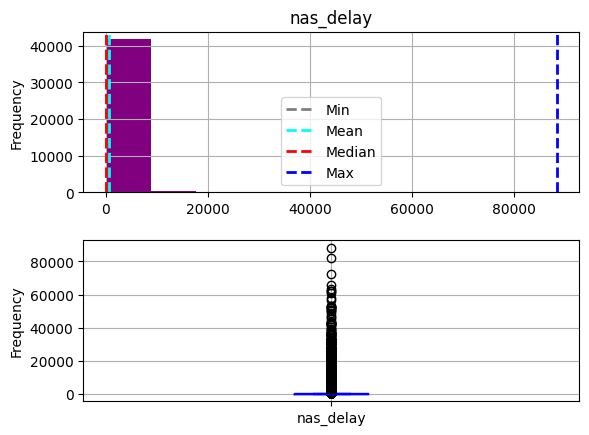

In [ ]:
subplot_function('nas_delay',"nas_delay")

## 4-Data Analysis


#### Q1-Which Airlines have the most delayed flights?

We can group the airline data and calculate the average of delayed flights per airline

In [ ]:
df_delays=df_cleaned.groupby(by="carrier_name", as_index=False)
#using the argument as_index=False in the groupby function will allow us to return a pandas dataframe, otherwise a pandas series will be returned.

we can see how many airlines has been grouped with the function .size():

In [ ]:
df_delays.size()

,carrier_name,size
0,Alaska Airlines Inc.,1851
1,Allegiant Air,3158
2,American Airlines Inc.,2574
3,Delta Air Lines Inc.,3212
4,Endeavor Air Inc.,2720
5,Envoy Air,3655
6,ExpressJet Airlines LLC,1161
7,Frontier Airlines Inc.,2499
8,Hawaiian Airlines Inc.,435
9,Horizon Air,383


next we calculate the mean of the delayed flights per airline:

In [ ]:
df_delays=df_delays["arr_del15"].mean()

In [ ]:
df_delays # here we get the top 5 of airlines with the most delays

,carrier_name,arr_del15
0,Alaska Airlines Inc.,31.467820
1,Allegiant Air,15.350775
2,American Airlines Inc.,90.818217
3,Delta Air Lines Inc.,56.543136
4,Endeavor Air Inc.,19.188427
5,Envoy Air,23.282030
6,ExpressJet Airlines LLC,18.713537
7,Frontier Airlines Inc.,18.742065
8,Hawaiian Airlines Inc.,26.290323
9,Horizon Air,22.976501


each arilines have associated the mean of deyalyed flights.

Let's plot the data using the Matplotlib and Seaborn visualisation libraries:

Always import a library prior to use it (only once in your script!):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

prior any plotting let's sort our data:

In [ ]:
# This code rearranges the rows in df_delays so that the rows with the largest values in the "arr_del15" column appear first, followed by rows with progressively smaller values.
df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)

Explanation of `df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)'

The code you provided, `df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)`, sorts a DataFrame named `df_delays` based on the values in the column "arr_del15" in descending order. Here's a breakdown of what each part does:

1. **`df_delays=df_delays`**: This assigns the result of the sorting operation back to the same DataFrame variable `df_delays`. It's essentially saying, "update the `df_delays` DataFrame with the sorted version."
2. **`.sort_values(...)`**: This is a method provided by pandas DataFrames for sorting rows based on specific criteria.
3. **`by=["arr_del15"]`**: This specifies the column to use for sorting. In this case, it's the "arr_del15" column.
4. **`ascending=False`**: This argument sets the sorting order. `False` means descending order, so rows with higher values in "arr_del15" will be placed at the top of the DataFrame.

In simpler terms, this code rearranges the rows in `df_delays` so that the rows with the **largest values** in the "arr_del15" column appear first, followed by rows with progressively smaller values.


In [ ]:
#this code creates a new DataFrame df4 that is a sorted version of df_cleaned with the rows arranged in descending order based on the values in the "arr_del15" column.
#Remember that the original df_cleaned remains unchanged.

df4=df_cleaned.sort_values(by=["arr_del15"], ascending=False)

Explanation of `df4=df_cleaned.sort_values(by=["arr_del15"], ascending=False)`

The code `df4=df_cleaned.sort_values(by=["arr_del15"], ascending=False)` performs a similar operation to the one you explained earlier. Here's a breakdown:

1. **`df4=...`**: This line creates a new DataFrame named `df4` and assigns the result of the sorting operation to it. This means `df4` will be a separate DataFrame containing the sorted data.
2. **`df_cleaned.sort_values(...)`**: This uses the `sort_values` method on the existing DataFrame `df_cleaned`.
3. **`by=["arr_del15"]`**: This specifies the column to use for sorting, which is "arr_del15" as before.
4. **`ascending=False`**: This sets the sorting order to descending, like in the previous code.

Therefore, this code creates a new DataFrame `df4` that is a **sorted version** of `df_cleaned` with the rows arranged in **descending order** based on the values in the "arr_del15" column. Remember that the original `df_cleaned` remains unchanged.



<ipython-input-49-7068de69dce3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)


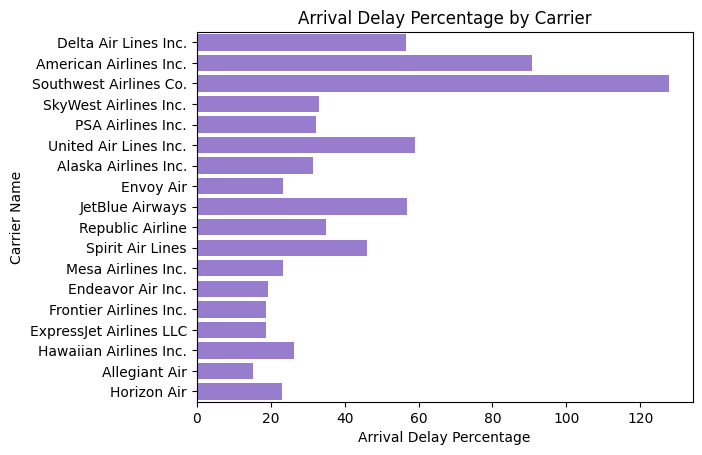

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)

# Customize the plot (optional)
plt.title("Arrival Delay Percentage by Carrier")
plt.xlabel("Arrival Delay Percentage")
plt.ylabel("Carrier Name")

# Show the plot
plt.show()

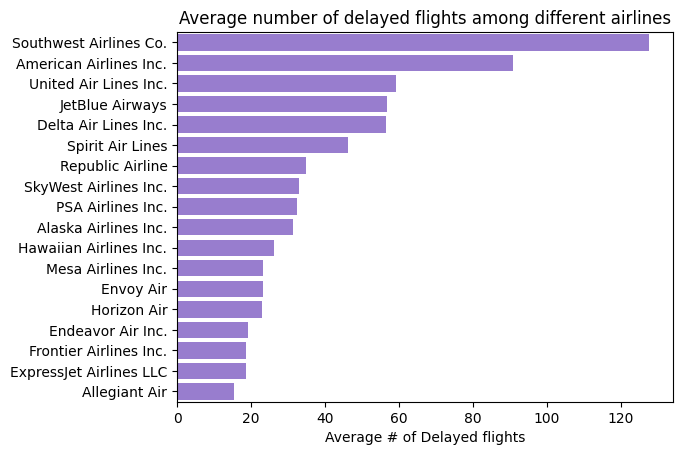

In [ ]:
sns.barplot(data=df_delays, x="arr_del15", y="carrier_name", color="mediumpurple",errorbar=None) # different parameters are added to the varplot function (color, graph orientation)
plt.title("Average number of delayed flights among different airlines")  # We are putting a title to the graph
plt.ylabel("") # We are changing the y axis label
plt.xlabel("Average # of Delayed flights") # We are changing the x axis label
plt.show() # We need to call the figure to display it with the show() function

We can see from the above plot that Southwest Airlines Co. has the most delayed flights compared to the other airlines.

#### Q2-Which Airline is the most affected by both delayed and cancelled flights?

let's use a similar approach as the previous analysis with the groupby() method:

Explanation of the next three lines of code:

 **Here's the code with explanatory comments:**

```python
# Group the DataFrame by carrier name, keeping carrier name as a column
df_delays_carrier = df_cleaned.groupby(by="carrier_name", as_index=False)

# Calculate mean values for 'arr_del15' and 'arr_cancelled' columns for each carrier
df_delays_carrier = df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()

# Display the resulting DataFrame
df_delays_carrier
```

**Explanation:**

1. **`df_delays_carrier = df_cleaned.groupby(by="carrier_name", as_index=False)`**
   - This line groups the rows in the DataFrame `df_cleaned` based on the values in the `carrier_name` column.
   - `as_index=False` ensures that the carrier names remain as a regular column in the resulting grouped DataFrame, rather than becoming the index.

2. **`df_delays_carrier = df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()`**
   - This line selects only two columns from the grouped DataFrame: `arr_del15` and `arr_cancelled`.
   - It then calculates the mean value for each of these columns within each carrier group.
   - The result is a new DataFrame `df_delays_carrier` containing the average delay and cancellation rates for each carrier.

3. **`df_delays_carrier`**
   - This line simply displays the contents of the DataFrame `df_delays_carrier`, showing the carrier names and their corresponding average delay and cancellation rates.


In [ ]:
df_delays_carrier=df_cleaned.groupby(by="carrier_name", as_index=False)

In [ ]:
df_delays_carrier=df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()

In [ ]:
df_delays_carrier

,carrier_name,arr_del15,arr_cancelled
0,Alaska Airlines Inc.,31.467820,4.393514
1,Allegiant Air,15.350775,5.340089
2,American Airlines Inc.,90.818217,19.720171
3,Delta Air Lines Inc.,56.543136,10.099874
4,Endeavor Air Inc.,19.188427,3.935543
5,Envoy Air,23.282030,5.369732
6,ExpressJet Airlines LLC,18.713537,5.384014
7,Frontier Airlines Inc.,18.742065,2.908764
8,Hawaiian Airlines Inc.,26.290323,5.204598
9,Horizon Air,22.976501,3.775457


Explanation of the code below
----

Here's the code with comments explaining what it does:

```python
# Set the 'carrier_name' column as the index of the DataFrame
df_delays_carrier = df_delays_carrier.set_index("carrier_name")

# Display the resulting DataFrame
print(df_delays_carrier)
```

**Explanation:**

1. **`df_delays_carrier = df_delays_carrier.set_index("carrier_name")`**:
   - This line uses the `set_index` method on the `df_delays_carrier` DataFrame.
   - The argument `'carrier_name'` specifies that we want to set the `carrier_name` column as the new index of the DataFrame.
   - This essentially means that the rows of the DataFrame will now be identified by their carrier names instead of their original numeric indices.

2. **`print(df_delays_carrier)`**:
   - This line simply prints the content of the modified `df_delays_carrier` DataFrame.

**Key Points:**

- Using `set_index` is a common way to organize and access data in DataFrames based on specific columns.
- After setting the index, you can access rows using the index values (carrier names in this case).
- Remember that setting the index modifies the original DataFrame in-place. If you want to preserve the original, create a copy before using `set_index`.



In [ ]:
df_delays_carrier=df_delays_carrier.set_index("carrier_name")
df_delays_carrier

,arr_del15,arr_cancelled
carrier_name,,
Alaska Airlines Inc.,31.467820,4.393514
Allegiant Air,15.350775,5.340089
American Airlines Inc.,90.818217,19.720171
Delta Air Lines Inc.,56.543136,10.099874
Endeavor Air Inc.,19.188427,3.935543
Envoy Air,23.282030,5.369732
ExpressJet Airlines LLC,18.713537,5.384014
Frontier Airlines Inc.,18.742065,2.908764
Hawaiian Airlines Inc.,26.290323,5.204598


<Axes: xlabel='carrier_name'>

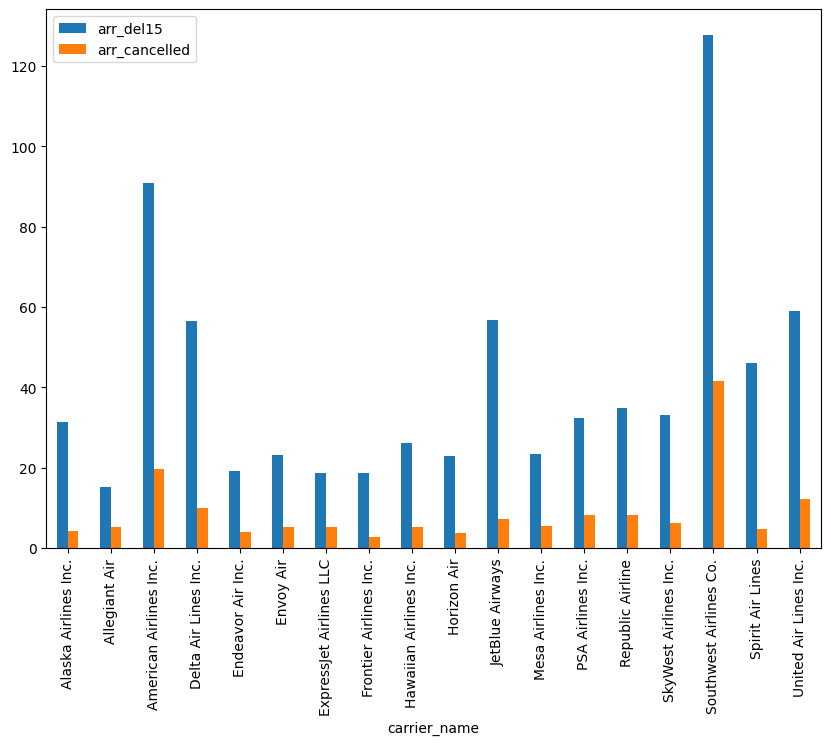

In [ ]:
df_delays_carrier.plot(kind="bar", figsize=(10,7))

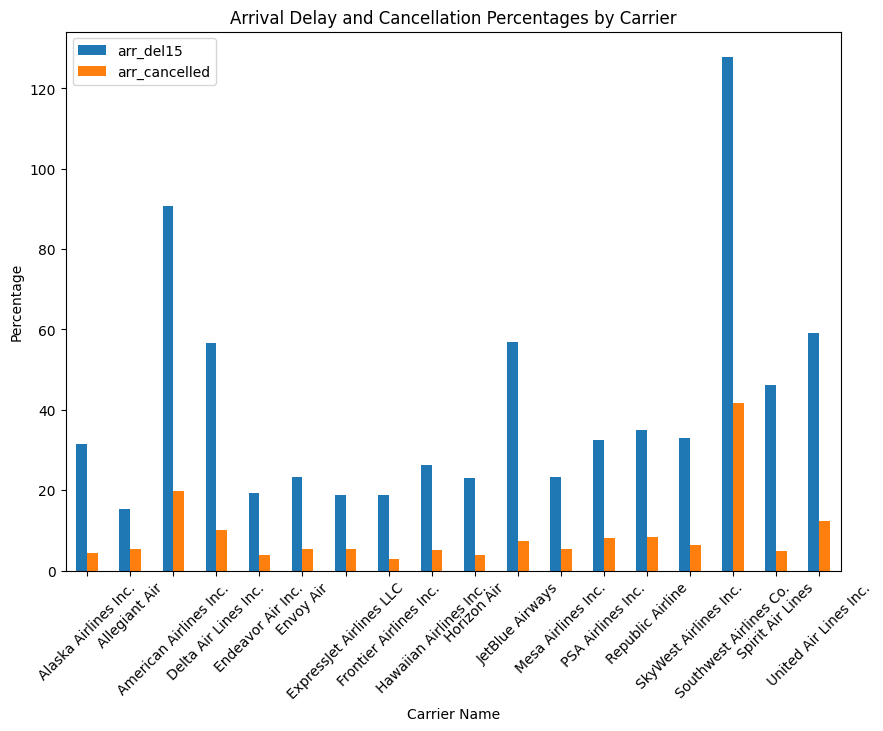

In [ ]:
# Create a bar plot showing arrival delay and cancellation percentages by carrier
df_delays_carrier.plot(kind="bar", figsize=(10, 7))

# Customize the plot (optional)
plt.title("Arrival Delay and Cancellation Percentages by Carrier")
plt.xlabel("Carrier Name")
plt.ylabel("Percentage")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()


<Axes: xlabel='carrier_name'>

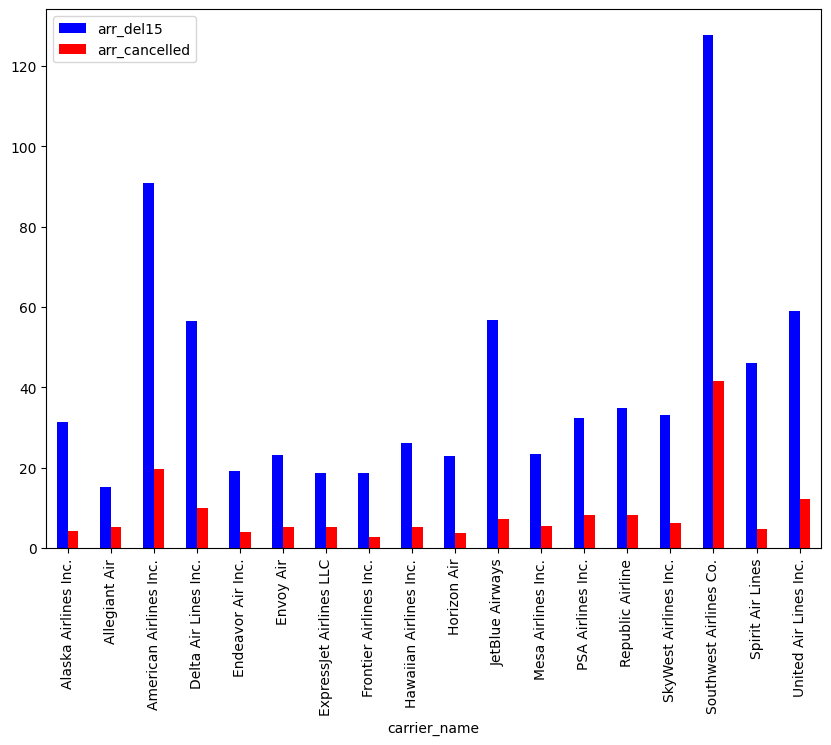

In [ ]:
# If you want to change the colour combination of the previous plot, define a color palette
colours= ['blue', 'red']
# Pass the new colours variable as parameter in the plot function
df_delays_carrier.plot(kind="bar", figsize=(10,7), color=colours)

Southwest Arilines Co. has also the most cancellation compared to the other carriers.

Let's investigate what could be the cause of the delayed of that company based on the data we have.

#### Q3-What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

Let's isolate data from the Southwest Airlines Co. to look at the causes. To do this we need to search for the company name in carrier_name column and isolate all columns related to that carrier.

The next three lines of code filters the `df_cleaned` DataFrame to focus on Southwest Airlines flights and then displays the first five rows of the resulting DataFrame. Here's a breakdown:

```python
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")
# Filter rows where the "carrier_name" contains "Southwest Airlines Co."
df_SW_airline = df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

# Display the first few rows of the filtered DataFrame
df_SW_airline.head()
```


**Line 1: `df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")`**

- This line uses string manipulation methods from the `pandas` library to filter the `carrier_name` column of the `df_cleaned` DataFrame.
- `df_cleaned["carrier_name"]` accesses the `carrier_name` column.
- `.str` provides string manipulation methods for the selected column.
- `.contains("Southwest Airlines Co.")` checks if each value in the `carrier_name` column contains the exact string "Southwest Airlines Co." (case-sensitive).
- The result is a Boolean Series where `True` indicates rows containing "Southwest Airlines Co." and `False` otherwise.

**Line 2: `df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]`**

- This line creates a new DataFrame named `df_SW_airline`.
- It uses square brackets `[]` to perform boolean indexing on the `df_cleaned` DataFrame.
- The condition inside the brackets specifies which rows to keep: only the rows where the corresponding element in the Boolean Series from line 1 is `True`.
- In simpler terms, this line selects all rows from `df_cleaned` where the `carrier_name` is "Southwest Airlines Co.".

**Line 3: `df_SW_airline.head()`**

- This line displays the first five rows of the newly created `df_SW_airline` DataFrame.
- `.head()` is a method for DataFrames that returns the specified number of rows at the beginning (default is 5).

So, the entire code snippet essentially filters the `df_cleaned` DataFrame to keep only flights operated by "Southwest Airlines Co." and then shows the first five rows of this filtered DataFrame.

I hope this explanation clarifies the purpose of the code!

In [ ]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

0        False
1        False
2        False
3        False
4        False
         ...  
42456    False
42457    False
42458    False
42459    False
42460    False
Name: carrier_name, Length: 42444, dtype: bool

In [ ]:
df_SW_airline=df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

In [ ]:
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,NaN,2022-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,NaN,2022-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,NaN,2022-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,NaN,2022-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,NaN,2022-07


In [ ]:
# To confirm we have well isolated one carrier only:
count=df_SW_airline["carrier_name"].nunique()
print(count)

1


In [ ]:
# To confirm we have well isolated one carrier only- alternative method:
'''
#This approach is often preferred over simply checking the number of unique values (nunique()) because it provides more detailed information about the actual airline names and their counts.
#This can be helpful for debugging or ensuring that your filtering process is working as expected.'''
df_SW_airline["carrier_name"].value_counts()

Southwest Airlines Co.    2406
Name: carrier_name, dtype: int64

In [ ]:
df_SW_airline.keys() # same as the .columns attribute

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

In [ ]:
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,NaN,2022-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,NaN,2022-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,NaN,2022-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,NaN,2022-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,NaN,2022-07


In [ ]:
df_SW_subset=df_SW_airline[["carrier_delay","weather_delay","nas_delay","security_delay"]] # We are selecting only the columns related to causes of delay
#NAS (National Aviation System) Delay

In [ ]:
df_SW_subset.head()

,carrier_delay,weather_delay,nas_delay,security_delay
1409,4255.0,66.0,720.0,60.0
1410,2147.0,126.0,116.0,19.0
1411,1033.0,35.0,128.0,0.0
1412,16615.0,1812.0,6030.0,52.0
1413,16714.0,1228.0,4232.0,234.0


In [ ]:
carrier_delay_tot=df_SW_subset["carrier_delay"].sum()  #we are going to create new columns to get the sum of all delay causes
print(carrier_delay_tot)

5518974.0


In [ ]:
weather_delay_tot=df_SW_subset["weather_delay"].sum()
nas_delay_tot=df_SW_subset["nas_delay"].sum() #NAS (National Aviation System) Delay
security_delay_tot=df_SW_subset["security_delay"].sum()

In [ ]:
print(weather_delay_tot)
print(nas_delay_tot)
print(security_delay_tot)

441728.0
2542425.0
48830.0


In [ ]:
data=[carrier_delay_tot,weather_delay_tot,nas_delay_tot,security_delay_tot]

In [ ]:
data

[5518974.0, 441728.0, 2542425.0, 48830.0]

In [ ]:
# We are creating a new dataframe containing only the sum of each delay causes
df_cause=pd.DataFrame(data)
df_cause

,0
0,5518974.0
1,441728.0
2,2542425.0
3,48830.0


In [ ]:
df_cause=pd.DataFrame(data,index=["carrier", "weather", "nas", "security"], columns=["causes"])
df_cause

,causes
carrier,5518974.0
weather,441728.0
nas,2542425.0
security,48830.0


Let's use an interactive visualisation library from Python named Plotly and Kleido which are part of dash:

import the library to use it:

In [ ]:
!pip install dash --upgrade

In [ ]:
import dash
print(dash.__version__)  # This will display the current version (e.g., 2.5.1)

2.15.0


In [ ]:
!pip show plotly


Name: plotly
Version: 5.15.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, dash, datascience, geemap, lida


In [ ]:
import plotly.express as px

In [ ]:
#sort the data before plotting
sorted_df= df_cause.sort_values(by='causes',ascending=False)
sorted_df

,causes
carrier,5518974.0
nas,2542425.0
weather,441728.0
security,48830.0


In [ ]:
figure= px.bar(sorted_df, title="Causes of flights cancellations and delays of the Southwest Airlines Co. from 2019-2022")

# Update the x-axis label
figure.update_xaxes(title='')
# Update the y-axis label
figure.update_yaxes(title='')

figure.show()

In [ ]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [ ]:
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


#### Q4-What are the main cause of flights cancellation and delays among the different airlines?

In [ ]:
df_cause_airlines=df_cleaned.groupby(by="carrier_name", as_index=True)[["carrier_delay","weather_delay","nas_delay", "security_delay"]].mean()
#We can set the index to carrier name directly when passing the argument as_index=True

In [ ]:
df_cause_airlines.head()

,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,
Alaska Airlines Inc.,489.294595,45.616757,470.972973,12.560541
Allegiant Air,387.435719,79.325522,188.015833,4.800507
American Airlines Inc.,2414.164011,346.050525,1215.510688,17.385931
Delta Air Lines Inc.,1622.915829,207.202261,887.169598,7.716709
Endeavor Air Inc.,500.519337,112.360958,329.980479,0.893554


In [ ]:
figure2 = px.bar(df_cause_airlines, title="Causes of flights cancelation and delay")
figure2.update_layout(xaxis_title="Airlines", yaxis_title="", legend_title="causes")
figure2.show()

In [ ]:
!pip install kaleido


In [ ]:
#!pip install -U kaleido


In [ ]:
import kaleido

In [ ]:
figure2.write_image("figure2.png", engine="kaleido")
#click on folder tab to see what file shave been create dand whether yuo can download them

In [ ]:
figure2.write_image("figure2.png")  # Example to save as PNG
figure2.write_image("figure2.svg")

In [ ]:
from google.colab import files
files.download("figure2.svg")
#click on folder tab to see what file shave been create dand whether yuo can download them


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("figure2.png")
#click on folder tab to see what file shave been create dand whether yuo can download them

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kaleido wasnt working for me so i explored orca engine

In [ ]:
#ignore this cell-orca to be exlored later
#figure2.write_image("figure2.png", engine="orca")  # Or "browser"


![Figure 2: Causes of flights cancelation and delay](figure2.png)


In [ ]:
figure2.write_html("figure2.html")
#click on folder tab to see what file shave been create dand whether yuo can download them

#### Q5-Does COVID-19 pandemic have an effect on flight delays and cancelations?

In [ ]:
df_cleaned.keys()

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

**Explanation of the code below.**
```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new matplotlib figure with a specified size
plt.figure(figsize=(15, 8))

# Add a vertical dashed line at the specific date '2020-01-01'
plt.axvline(pd.Timestamp('2020-01-01'), color='purple', linestyle='--')

# Set the title of the plot
plt.title("Number of canceled flights during 2019 to 2022")

# Set the label for the y-axis (vertical axis)
plt.ylabel("# of Cancelled flights")

# Create a line plot using Seaborn
sns.lineplot(data=df_cleaned, x="date", y="arr_cancelled")
```

<Axes: title={'center': 'Number of canceled flights during 2019 to 2022'}, xlabel='date', ylabel='# of Cancelled flights'>

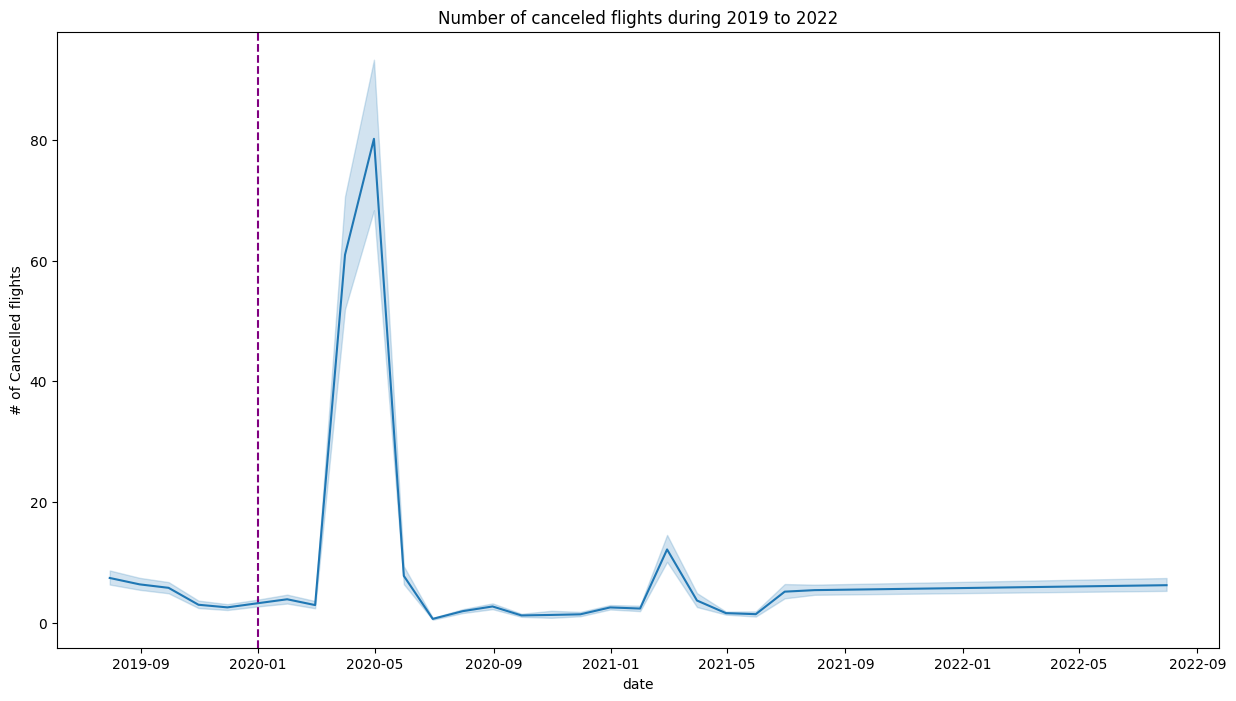

In [ ]:
plt.figure(figsize = (15,8))

plt.axvline(pd.Timestamp('2020-01-01'),color='purple',linestyle='--' ) # we need to create a specific point in time with the Timestamp() function from pandas
#axhline: for horizontal line

plt.title("Number of canceled flights during 2019 to 2022")

plt.ylabel("# of Cancelled flights")

sns.lineplot(data=df_cleaned,x = "date", y = "arr_cancelled")


We can see a sharp increase of flighs being canceled just after the appartion of the COVID-19 pandemic (purple dash line) and lockdowns that had followed and affected airline operations.

<Axes: title={'center': 'Number of canceled flights during 2019 to 2022'}, xlabel='date', ylabel='# of Cancelled flights'>

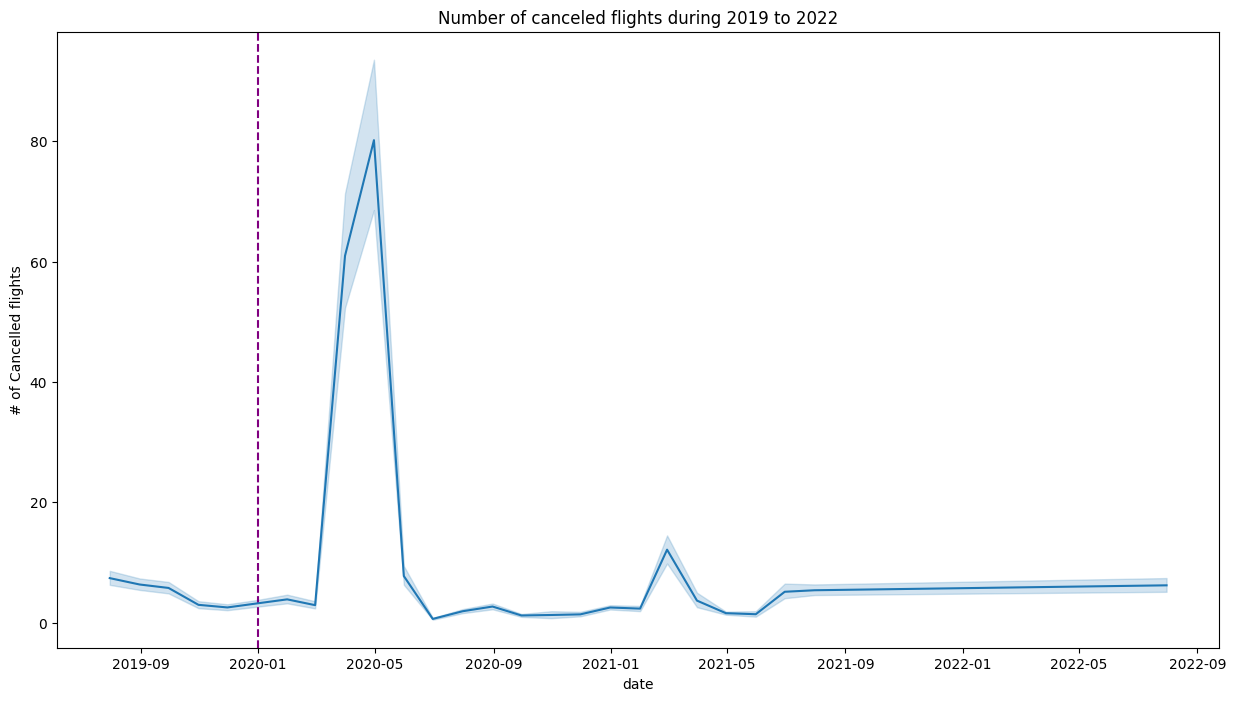

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new matplotlib figure with a specified size
plt.figure(figsize=(15, 8))

# Add a vertical dashed line at the specific date '2020-01-01'
plt.axvline(pd.Timestamp('2020-01-01'), color='purple', linestyle='--')

# Set the title of the plot
plt.title("Number of canceled flights during 2019 to 2022")

# Set the label for the y-axis (vertical axis)
plt.ylabel("# of Cancelled flights")

# Create a line plot using Seaborn
sns.lineplot(data=df_cleaned, x="date", y="arr_cancelled")

In [ ]:
figure2.write_image("figure2.png", engine="kaleido")

In [ ]:
# Save the figure to an image file (e.g., 'my_plot.png')
plt.savefig('cancellled_flights.png')

# Now you can download 'my_plot.png' from the Files tab on the left sidebar

<Figure size 640x480 with 0 Axes>

In [ ]:
# Optionally, close the figure window to free up memory
plt.close()

In [ ]:
print(df_cleaned.head())

  carrier       carrier_name airport  \
0      9E  Endeavor Air Inc.     ABE   
1      9E  Endeavor Air Inc.     ABY   
2      9E  Endeavor Air Inc.     ACK   
3      9E  Endeavor Air Inc.     AEX   
4      9E  Endeavor Air Inc.     AGS   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         33.0        2.0   
1             Albany, GA: Southwest Georgia Regional         78.0       25.0   
2                  Nantucket, MA: Nantucket Memorial        124.0       19.0   
3           Alexandria, LA: Alexandria International         67.0       10.0   
4        Augusta, GA: Augusta Regional at Bush Field        174.0       30.0   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0            0.0           0.0      129.0           98.0           23.0   
1            0.0           0.0     1664.0          887.0           52.0   
2            5.0           4.0     1523.0          38